In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

In [223]:
train_df = pd.read_csv('../project_2-master/datasets/train.csv')
test_df = pd.read_csv('../project_2-master/datasets/test.csv')

In [224]:
# Training ORDINAL values -- from data dictionary
ordinal_train = train_df[['Id', 'Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 
          'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
          'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual',
          'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'SalePrice'
         ]]
ordinal_train.head(1)

,Id,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,...,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,SalePrice
0,109,IR1,AllPub,Gtl,6,8,Gd,TA,TA,TA,...,Gd,Typ,NaN,RFn,TA,TA,Y,NaN,NaN,130500


In [225]:
# Testing ORDINAL values -- from data dictionary
ordinal_test = test_df[['Id', 'Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 
          'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
          'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual',
          'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 
         ]]
ordinal_test.head(1)

,Id,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,...,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence
0,2658,Reg,AllPub,Gtl,6,8,TA,Fa,Fa,TA,...,FuseP,Fa,Typ,NaN,Unf,Po,Po,Y,NaN,NaN


In [226]:
# Need to map the ordinal features with number
# Credit to Haley Taft
ordinal_columns = {'Lot Shape' : {'IR3' : 1, 'IR2' : 2, 'IR1' : 3, 'Reg' : 4}, 
                   'Utilities': {'ELO' : 0, 'NoSeWa' : 1, 'NoSewr' : 2, 'AllPub' : 3}, 
                   'Land Slope': {'Sev' : 1, 'Mod' : 2, 'Gtl' : 3}, 
                   'Exter Qual': {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
                   'Exter Cond': {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
                   'Bsmt Qual' : {np.nan : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},   # not sure about this one 
                   'Bsmt Cond' : {np.nan : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},    # or this one
                   'Bsmt Exposure' : {np.nan : 0, 'No' : 1, 'Mn' : 2, 'Av' : 3, 'Gd' : 4}, 
                   'BsmtFin Type 1' : {np.nan : 0, 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6},
                   'BsmtFin Type 2' : {np.nan : 0, 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6},
                   'Heating QC' : {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}, 
                   'Electrical' : {np.nan : 0, 'Mix' : 1, 'FuseP' : 2, 'FuseF' : 3, 'FuseA' : 4, 'SBrkr' : 5},
                   'Kitchen Qual' : {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
                   'Functional' : {'Sal' : 1, 'Sev' : 2, 'Maj2' : 3, 'Maj1' : 4, 'Mod': 5, 'Min2' : 6, 'Min1' : 7, 'Typ' : 8}, 
                   'Fireplace Qu' : {np.nan : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
                   'Garage Finish' : {np.nan : 0, 'Unf' : 1, 'RFn' : 2, 'Fin' : 3},
                   'Garage Qual' : {np.nan : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
                   'Garage Cond' : {np.nan : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
                   'Paved Drive' : {'N' : 1, 'P' : 2, 'Y' : 3},
                   'Pool QC' : {np.nan : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4},
                   'Fence' : {np.nan : 0, 'MnWw' : 1, 'GdWo' : 2, 'MnPrv' : 3, 'GdPrv' : 4} }

In [227]:
ordinal_train.replace(ordinal_columns, inplace = True)
ordinal_test.replace(ordinal_columns, inplace = True)

/Users/aidancurley/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


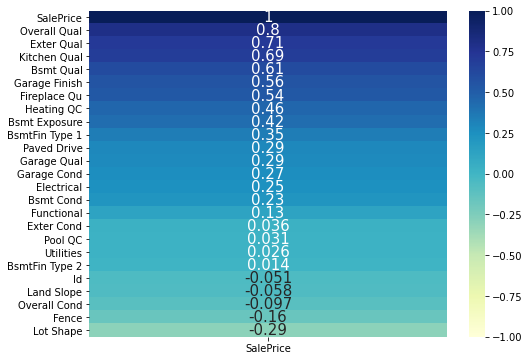

In [228]:
# I only want features with more than 50% correlation
plt.figure(figsize=(8,6))
sns.heatmap(ordinal_train.corr()[['SalePrice']].sort_values(by="SalePrice",
       ascending=False),
           annot=True,
           cmap='YlGnBu',
           annot_kws={'fontsize':15},
           vmin=-1, vmax=1, );

In [233]:
def over_fifty(train, test):
    
    # This gets me all of the features with a correlation of over .50
    corr_over_fifty_cols = train.columns[train.corr()['SalePrice'] > .50] # Credit to Eric Heidbreder
    
    # Training correlation over .50
    final_df_train = train[corr_over_fifty_cols[:-1]]
    final_df_train = final_df_train.join(train['Id'])
    
    # Reorder the columns so 'Id' is first
    cols = list(final_df_train.columns)
    cols = [cols[-1]] + cols[:-1]
    final_df_train = final_df_train[cols]

    # Testing correlation over .50
    final_df_test = test[corr_over_fifty_cols[:-1]]
    final_df_test = final_df_test.join(test['Id'])
    
    # Reorder the columns so 'Id' is first
    cols = list(final_df_test.columns)
    cols = [cols[-1]] + cols[:-1]
    final_df_test = final_df_test[cols]
    
    # Send out the csv to main merging function
    final_df_train.to_csv('../project_2-master/datasets/ordinal_train.csv', index=False)
    final_df_test.to_csv('../project_2-master/datasets/ordinal_test.csv', index=False)
    
    return final_df_train

In [234]:
over_fifty(ordinal_train, ordinal_test)

,Id,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Fireplace Qu,Garage Finish
0,109,6,4,3,4,0,2
1,544,7,4,4,4,3,2
2,153,5,3,3,4,0,1
3,318,5,3,4,3,0,3
4,255,6,3,2,3,0,1
...,...,...,...,...,...,...,...
2046,1587,8,4,4,4,4,3
2047,785,4,3,3,3,0,1
2048,916,6,3,3,3,3,1
2049,639,4,3,3,3,4,1


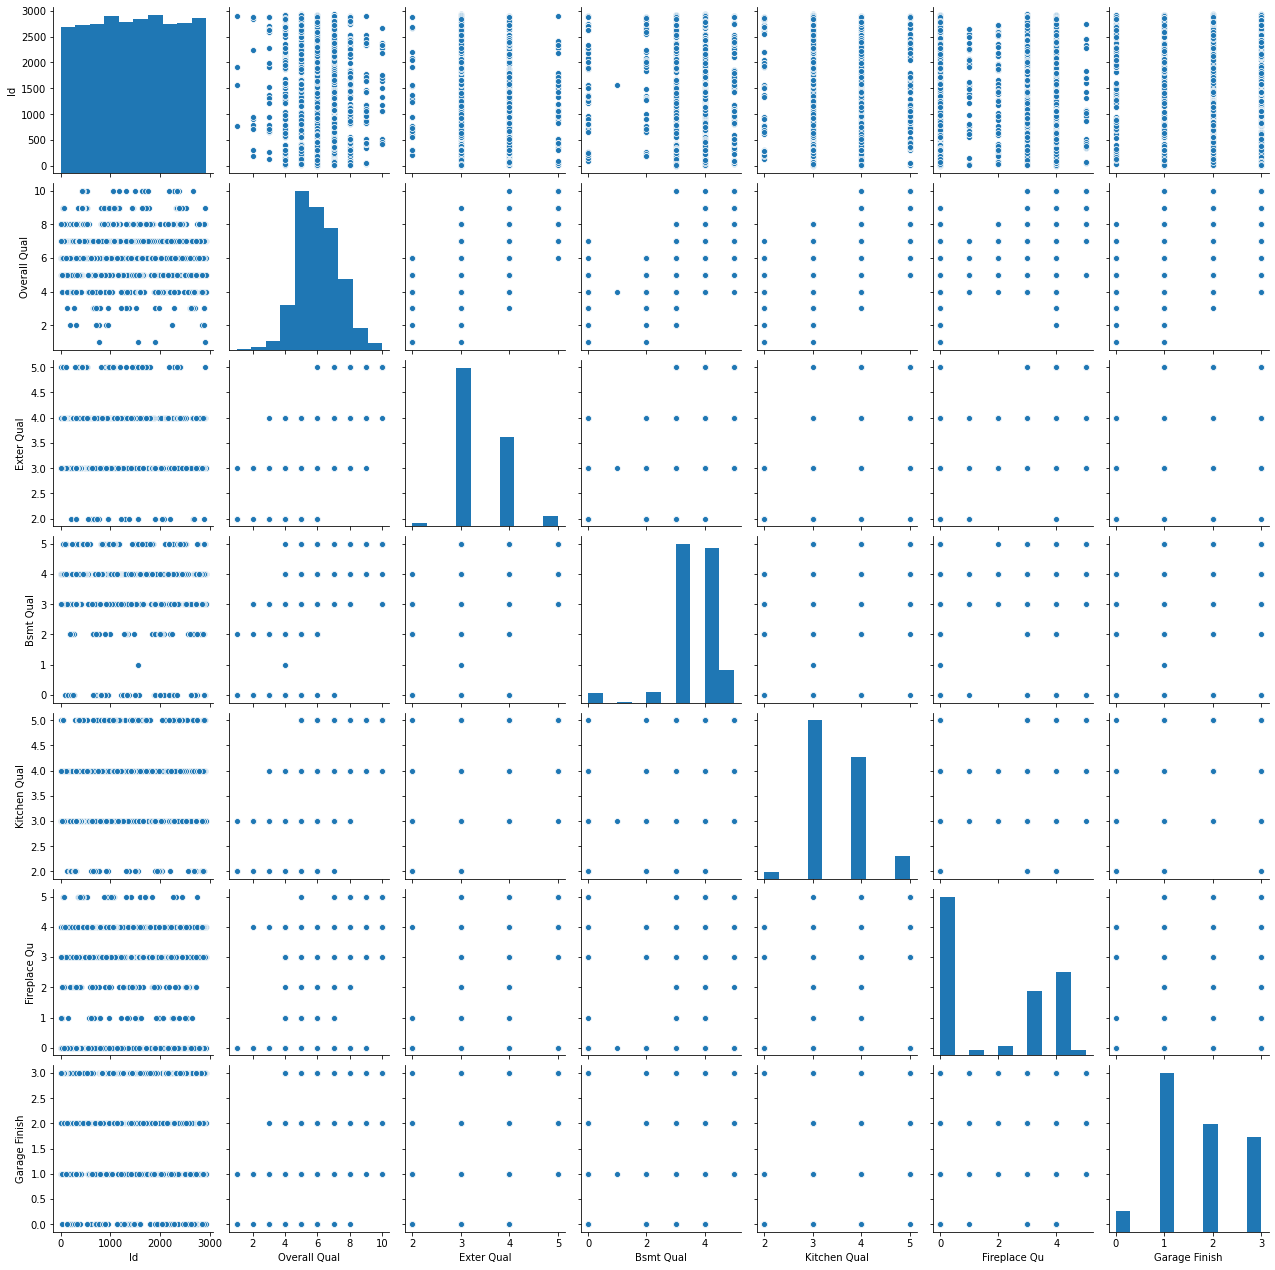

In [232]:
over_fifty(ordinal_train, ordinal_test)